In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import zipfile

import shutil
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Thu Oct 23 05:10:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
file_path = '/content/drive/MyDrive/CHERRY TESIS/cherry_yolov8s_database.zip'

# Verificar que el archivo existe
if os.path.exists(file_path):
    print(f"Archivo encontrado: {file_path}")
else:
    print("Archivo no encontrado. Verifica la ruta.")

Archivo encontrado: /content/drive/MyDrive/CHERRY TESIS/cherry_yolov8s_database.zip


In [ ]:
data = zipfile.ZipFile('/content/drive/MyDrive/CHERRY TESIS/cherry_yolov8s_database.zip', 'r')
data.extractall('/content/cherry_yolov8s_database')

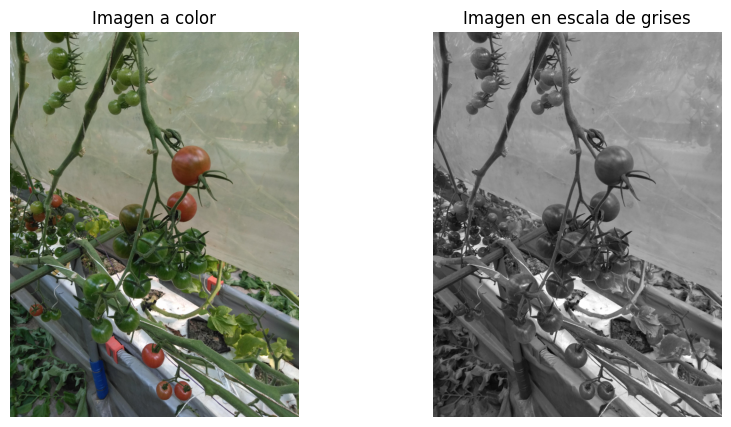

In [ ]:
from skimage import io, color
# Leer la imagen a color (suponiendo que el nombre de la imagen es 'imagen_color.jpg')
imagen_color = io.imread('/content/cherry_yolov8s_database/cherry_yolov8s_database/images/test/IMG_20191215_111912_jpg.rf.2a915553ca015d1365c3ef19eaa55e29.jpg')

# Convertir la imagen a escala de grises
imagen_gris = color.rgb2gray(imagen_color)


# Mostrar las dos imágenes: color y en escala de grises
plt.figure(figsize=(10,5))

# Imagen a color
plt.subplot(1, 2, 1)
plt.imshow(imagen_color)
plt.title('Imagen a color')
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.show()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.1 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
config_path = '/content/cherry_yolov8s_database/cherry_yolov8s_database/configura.yaml'
model = YOLO("yolov8s.pt")

model.train(
    data=config_path,
    epochs=150,
    batch=16,
    imgsz=640,
    patience=50,

    optimizer='AdamW',
    lr0=0.001,
    lrf=0.01,

    box=7.5,
    cls=0.5,
    dfl=1.5,

    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=15,
    translate=0.1,
    scale=0.6,
    shear=0,
    flipud=0.5,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.15,
    copy_paste=0.1,

    dropout=0.1,

    device=0,
    workers=4,

    save_period=10,
    project='cherry_training',
    name='yolov8s_optimized'
)



Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/cherry_yolov8s_database/cherry_yolov8s_database/configura.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_optimized, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f582e8dc8f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
!yolo predict model="/content/cherry_training/yolov8s_optimized/weights/best.pt" source="/content/cherry_yolov8s_database/cherry_yolov8s_database/images/test/0bfaae18-IMG_20250514_085616.jpg"

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/cherry_yolov8s_database/cherry_yolov8s_database/images/test/0bfaae18-IMG_20250514_085616.jpg: 320x640 1 Lista_para_polinizar, 3 No_desarrolladas, 2 Sin_polens, 42.3ms
Speed: 2.2ms preprocess, 42.3ms inference, 3.9ms postprocess per image at shape (1, 3, 320, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo predict model="/content/cherry_training/yolov8s_optimized/weights/best.pt" source="/content/cherry_yolov8s_database/cherry_yolov8s_database/images/test" save=True

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/65 /content/cherry_yolov8s_database/cherry_yolov8s_database/images/test/019e9415-IMG_20250430_081632.jpg: 640x320 2 Lista_para_polinizars, 1 Sin_polen, 2 mixtos, 6 rojos, 12 verdes, 42.4ms
image 2/65 /content/cherry_yolov8s_database/cherry_yolov8s_database/images/test/05d96149-IMG_20250514_090056.jpg: 320x640 5 Sin_polens, 43.1ms
image 3/65 /content/cherry_yolov8s_database/cherry_yolov8s_database/images/test/06e0fb27-IMG_20250512_085952412.jpg: 480x640 1 Lista_para_polinizar, 1 No_desarrollada, 3 Sin_polens, 43.0ms
image 4/65 /content/cherry_yolov8s_database/cherry_yolov8s_database/images/test/0b1ef8dd-IMG_20250514_090550.jpg: 320x640 1 Lista_para_polinizar, 1 No_desarrollada, 4 Sin_polens, 11.1ms
image 5/65 /content/cherry_yolov8s_database/cherry_yolov8s_database/images/test/0bfaae18-IMG_20250514_085616.jpg: 320x6

In [ ]:
!zip -r /content/testeo.zip /content/runs/detect/predict2

  adding: content/runs/detect/predict2/ (stored 0%)
  adding: content/runs/detect/predict2/IMG_20191215_111941_jpg.rf.dbfd11e49b2801291e8922891077f03b.jpg (deflated 5%)
  adding: content/runs/detect/predict2/ff76eb65-IMG_20250514_090836.jpg (deflated 0%)
  adding: content/runs/detect/predict2/IMG_20191215_112546_jpg.rf.4238e9b8d6a87a5e435a7fd4f346e91b.jpg (deflated 4%)
  adding: content/runs/detect/predict2/b771c54f-IMG_20250430_081545.jpg (deflated 1%)
  adding: content/runs/detect/predict2/IMG_20191215_112001_jpg.rf.a46d0e55cf63bb55133c3a53336fccf6.jpg (deflated 5%)
  adding: content/runs/detect/predict2/IMG_20191215_112616_jpg.rf.f8d499c6fc7c1272cd6bb85c3f79bf1d.jpg (deflated 4%)
  adding: content/runs/detect/predict2/3e0d8836-IMG_20250508_081142.jpg (deflated 1%)
  adding: content/runs/detect/predict2/4251c6db-IMG_20250514_091047.jpg (deflated 1%)
  adding: content/runs/detect/predict2/27011894-IMG_20250514_090904.jpg (deflated 1%)
  adding: content/runs/detect/predict2/a8268b55-IM

In [ ]:
model = YOLO('/content/cherry_training/yolov8s_optimized/weights/best.pt')

model.export(format="onnx")
model.export(format="tflite")
model.export(format="coreml")
model.export(format="openvino")
model.export(format="torchscript")

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/cherry_training/yolov8s_optimized/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (21.5 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 1.5s, saved as '/content/cherry_training/yolov8s_optimized/weights/best.onnx' (42.7 MB)

Export complete (2.4s)
Results saved to /content/cherry_training/yolov8s_optimized/weights
Predict:         yolo predict task=detect model=/content/cherry_training/yolov8s_optimized/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/cherry_training/yolov8s_optimized/weights/best.onnx imgsz=640 data=/content/cherry_yolov8s_database/cherry_yolov8s_database/configura.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.220


CoreML: starting export with coremltools 9.0b1...


Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 95.38 passes/s]


CoreML: export success ✅ 12.0s, saved as '/content/cherry_training/yolov8s_optimized/weights/best.mlpackage' (21.4 MB)

Export complete (13.2s)
Results saved to /content/cherry_training/yolov8s_optimized/weights
Predict:         yolo predict task=detect model=/content/cherry_training/yolov8s_optimized/weights/best.mlpackage imgsz=640  
Validate:        yolo val task=detect model=/content/cherry_training/yolov8s_optimized/weights/best.mlpackage imgsz=640 data=/content/cherry_yolov8s_database/cherry_yolov8s_database/configura.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/cherry_training/yolov8s_optimized/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (21.5 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0'] not found, attempting AutoUpda

'/content/cherry_training/yolov8s_optimized/weights/best.torchscript'

In [ ]:
model = YOLO('/content/cherry_training/yolov8s_optimized/weights/best.pt')

model.export(format="tflite", imgsz=640, int8=True)

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/cherry_training/yolov8s_optimized/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (21.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.19.0...

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 2.0s, saved as '/content/cherry_training/yolov8s_optimized/weights/best.onnx' (42.8 MB)
TensorFlow SavedModel: collecting INT8 calibration images from 'data=coco8.yaml'

WARNING ⚠️ Dataset 'coco8.yaml' images not found, missing path '/content/datasets/coco8/images/val'
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% ━━━━━━━━━━━━ 25/25 2.0Kfiles/s 0.0s
D

'/content/cherry_training/yolov8s_optimized/weights/best_saved_model/best_int8.tflite'

In [ ]:
!zip -r /content/datos_ent.zip /content/cherry_training

  adding: content/cherry_training/ (stored 0%)
  adding: content/cherry_training/yolov8s_optimized/ (stored 0%)
  adding: content/cherry_training/yolov8s_optimized/confusion_matrix_normalized.png (deflated 19%)
  adding: content/cherry_training/yolov8s_optimized/weights/ (stored 0%)
  adding: content/cherry_training/yolov8s_optimized/weights/best_openvino_model/ (stored 0%)
  adding: content/cherry_training/yolov8s_optimized/weights/best_openvino_model/best.xml (deflated 94%)
  adding: content/cherry_training/yolov8s_optimized/weights/best_openvino_model/metadata.yaml (deflated 39%)
  adding: content/cherry_training/yolov8s_optimized/weights/best_openvino_model/best.bin (deflated 16%)
  adding: content/cherry_training/yolov8s_optimized/weights/epoch10.pt (deflated 38%)
  adding: content/cherry_training/yolov8s_optimized/weights/epoch90.pt (deflated 38%)
  adding: content/cherry_training/yolov8s_optimized/weights/epoch120.pt (deflated 37%)
  adding: content/cherry_training/yolov8s_optim

In [ ]:
!zip -r /content/runs.zip /content/runs

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/val_batch2_pred.jpg (deflated 5%)
updating: content/runs/detect/train/args.yaml (deflated 53%)
updating: content/runs/detect/train/val_batch2_labels.jpg (deflated 6%)
updating: content/runs/detect/train/BoxF1_curve.png (deflated 7%)
updating: content/runs/detect/train/val_batch0_pred.jpg (deflated 5%)
updating: content/runs/detect/train/labels.jpg (deflated 26%)
updating: content/runs/detect/train/train_batch5040.jpg (deflated 18%)
updating: content/runs/detect/train/results.png (deflated 8%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 8%)
updating: content/runs/detect/train/BoxR_curve.png (deflated 7%)
updating: content/runs/detect/train/confusion_matrix.png (deflated 22%)
updating: content/runs/detect/train/BoxPR_curve.png (deflated 10%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 5%)
